### Import data and pre-processing 

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("C:/Users/Colaborador/Desktop/Bank clients clustering/CC GENERAL.csv")
dataframe.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Colaborador/Desktop/Bank clients clustering/CC GENERAL.csv'

In [ ]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [ ]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
dataframe.fillna(dataframe.median(), inplace=True)

In [ ]:
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


### Usando Kmeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

### Métricas

Silhouette

In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644845919974304


Davies Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0757138590613293


Calisnski Harabasz

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.79374284143


In [ ]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3271826655450134 1.305464383213604 3526.347030037461


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454411415175675 1.075964042098547 3431.797010715037


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print(s3, dbs3, calinski3)

0.29738278204245194 1.210217322976912 2403.6725691570637


### Validando a clusterização

Validando a estrutura dos usados para clusterização em comparação a dados gerados aleatóriamente

In [ ]:
import numpy as np
random_data = np.random.rand(8950, 16)
clustering_algorithm(5, random_data)

(0.03942214036997685, 3.5176311547626518, 301.6029287793254)

### Gerando a vizualização

In [ ]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

Text(0, 0.5, 'Valor total gasto')

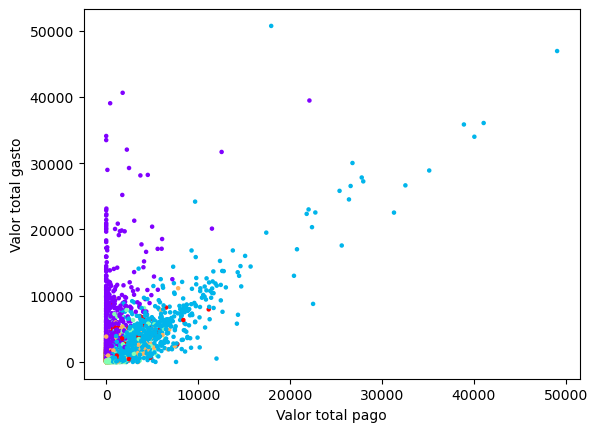

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

In [ ]:
import seaborn as sns
dataframe['cluster'] = labels
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.024195  1982.950586   0.000000   506.925348   
1        1540.0  1142.222657  1664.035755   0.000000   211.566656   
2        3278.0   443.992358   846.597972   0.000000    23.315538   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1         554.332740  1370.859355  19043.138560            1540.0  0.928053   
2          82.992153   411.193793   9630.367575            3278.0  0.774417   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.718306  21235.065300           1072.0  0.117384   
1        ...       524.184580  18621.013310           1540.0  0.278582   
2        ...       248.800040   4483.503862           3278.0  0.246549   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186853  0.0  0.0  0.083333  0.142857  1.0  
1        0.367203  0.0  0.0  0.083333  0.545455  1.0  
2        0.346601  0.0  0.0  0.000000  0.444444  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
centroides = kmeans.cluster_centers_
centroides

array([[2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.04882397e-05,
        3.51921361e-05, 6.54864556e-05, 1.57199032e-03, 1.12217156e-03,
        5.35089146e-01, 5.98040052e-01, 1.04348171e-01, 2.77498236e-05],
       [1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
        1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
        1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
        6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.37097813e-05,
        1.40021986e-04, 7.93309218e-06, 1.24113667e-04, 2.86037895e-03,
        9.43728649e-01, 1.53557708e-01, 5.68217245e-02, 7.57977264e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.569

In [ ]:
for i in range(len(centroides[0])):
  print(dataframe.columns.values[i],  '= {:.4f}'.format(centroides[:, i].var()))

BALANCE = 0.0224
BALANCE_FREQUENCY = 0.0000
PURCHASES = 0.0196
ONEOFF_PURCHASES = 0.0076
INSTALLMENTS_PURCHASES = 0.0036
CASH_ADVANCE = 0.0225
PURCHASES_FREQUENCY = 0.0000
ONEOFF_PURCHASES_FREQUENCY = 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY = 0.0000
CASH_ADVANCE_FREQUENCY = 0.0000
CASH_ADVANCE_TRX = 0.0000
PURCHASES_TRX = 0.0000
CREDIT_LIMIT = 0.0360
PAYMENTS = 0.0280
MINIMUM_PAYMENTS = 0.0543
PRC_FULL_PAYMENT = 0.0000


In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

C:\Users\Colaborador\AppData\Local\Temp\ipykernel_15052\756818207.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
1,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
2,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
3,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


In [ ]:
'''
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.
'''